# Training the models - Solar Fault Detection
- We'll use Linear Regression, Random Forest Regressor, and a Neural Network to predict "Utilzation"
- We will use 'Month', 'Date', 'Hour', 'Minute', 'G_tilt', 'T_air', 'Utilization' to train the models

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/data.csv')
print(data.head())

   Year  Month  Day  Hour  Minute  T_air  G_h  G_tilt   W_s    W_d  PV_Power  \
0  2017      1    3     8       5   0.63  2.0     3.0  0.25  318.8  0.862305   
1  2017      1    3     8       6   0.73  2.0     4.0  0.00  309.3  0.862305   
2  2017      1    3     8       7   0.88  3.0     4.0  0.30  330.1  0.844879   
3  2017      1    3     8      11   0.03  7.0     9.0  1.11   11.8  0.844879   
4  2017      1    3     8      12  -0.39  7.0    11.0  0.84   24.1  0.844879   

   Utilization  
0     0.003085  
1     0.003085  
2     0.003023  
3     0.003023  
4     0.003023  


In [11]:
# Divide data into test and train

train = data.sample(frac=0.8, random_state=200)
test = data.drop(train.index)

print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Train: (158918, 12)
Test: (39729, 12)


## Feature and Target Variables (Edit as Needed)

In [12]:
# Declare Feature and Target cols (Edit as needed)

feature_cols = ['Month', 'Day', 'Hour', 'Minute', 'T_air', 'G_tilt']
target_col = 'Utilization'

# Linear Regression Model

MSE: 0.005952083391797493
R2: 0.9063607431380601


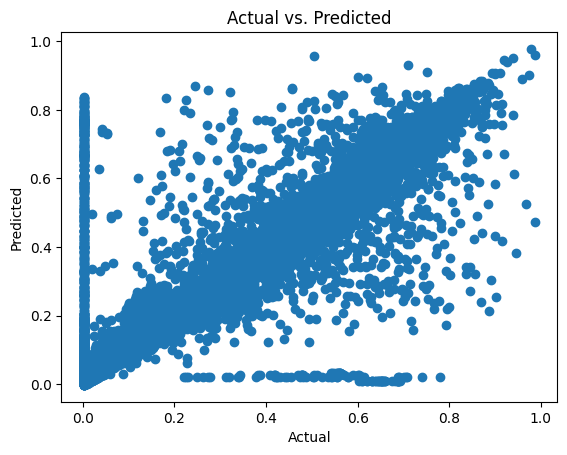

In [13]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(train[feature_cols], train[target_col])

# Predict

predictions = model.predict(test[feature_cols])

# Evaluate by MSE and R2, plot predicted vs. actual

mse = mean_squared_error(test[target_col], predictions)
r2 = r2_score(test[target_col], predictions)

print(f'MSE: {mse}')
print(f'R2: {r2}')

plt.scatter(test[target_col], predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Linear Regression)')
plt.show()

# Random Forest Regressor

MSE: 0.0014969196520299756
R2: 0.9764501881826306


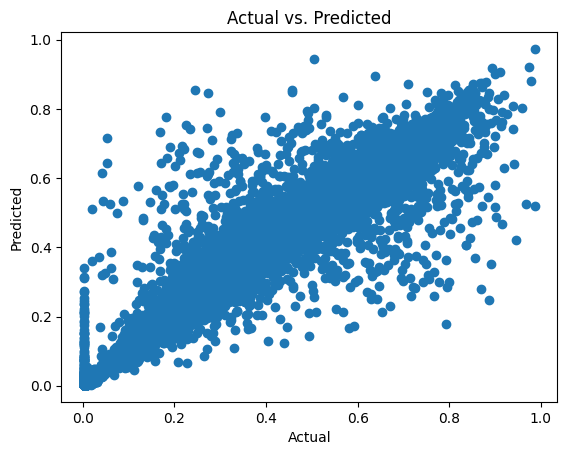

In [14]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=200) # Edit n_estimators as needed
model.fit(train[feature_cols], train[target_col])

predictions = model.predict(test[feature_cols])

mse = mean_squared_error(test[target_col], predictions)
r2 = r2_score(test[target_col], predictions)

print(f'MSE: {mse}')
print(f'R2: {r2}')

plt.scatter(test[target_col], predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Random Forest Regressor)')
plt.show()

# Neural Network

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(feature_cols),)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# X data is not normalized
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train[feature_cols])

train[feature_cols] = scaler.transform(train[feature_cols])
test[feature_cols] = scaler.transform(test[feature_cols])

# Train the model
model.fit(train[feature_cols], train[target_col], epochs=20, verbose=1)

c:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0129
Epoch 2/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0032
Epoch 3/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0018
Epoch 4/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0017
Epoch 5/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0016
Epoch 6/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0016
Epoch 7/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0016
Epoch 8/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0015
Epoch 9/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0016
Epoch 10/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0015
Epoch 11/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0015
Epoch 12/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0015
Epoch 13/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0016
Epoch 14/20
4967/4967 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0016
Epoch 15/20
496

1242/1242 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
MSE: 0.0015925575076895266
R2: 0.9749455960688556


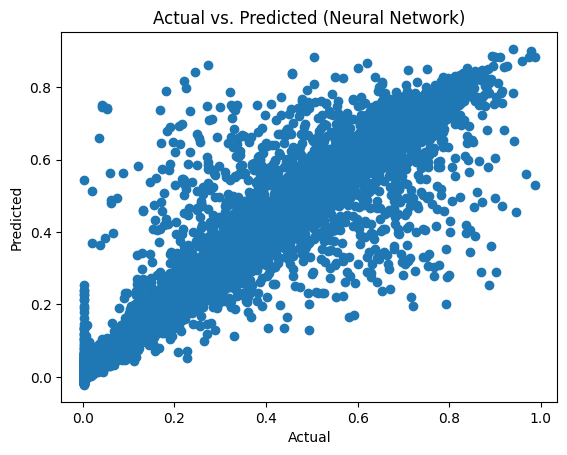

In [17]:
# Predict
predictions = model.predict(test[feature_cols])

# Evaluate by MSE and R2, plot predicted vs. actual
mse = mean_squared_error(test[target_col], predictions)
r2 = r2_score(test[target_col], predictions)

print(f'MSE: {mse}')
print(f'R2: {r2}')

plt.scatter(test[target_col], predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Neural Network)')
plt.show()